In [1]:
from agent import AMSAgent
from model import AMSModel
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import statsmodels.api as sm


In [173]:
initial_states = []
N = 100 # Number of agents
num_steps = 10000
vector_x = np.random.rand(N)
vector_y = np.random.rand(N)
for i in range(N): 
    initial_states.append({'x' : vector_x[i], 
                         'y' : vector_y[i], 
                         'configuration' : 'line', # modify square for regular lattice
                         'fluctuation' : False, 
                         'realism' : True,
                         'radius' : 1.,
                         'frequency' : 50, # number of agent in state 1 
                         'b' : np.array([[0.8, 0.2], [0.2, 0.8]]), #[[x^2, xy], [xy, y^2]]
                         'beta' : 50, #beta = 10 deterministic + fast convergence 
                         'rho_0' : .7, 'rho_1' : .7,
                         'T' : 500,
                         'Q' : 1, 'S_factor' : 1, 'a' : 1, 'gamma_e' : 1,
                         'y_thr' : 1, 
                         'dt' : 0.1})
model = AMSModel(x_max=3, y_max=3, max_steps=num_steps, model_type='isolated', initial_agents=N, initial_states=initial_states, seed = 1)


In [3]:
def xyplot_isolated(t, x, y, filename = './plots/iso/plotxy_iso.pdf'):
    plt.plot(t, x, color = 'red', label = 'x')
    plt.plot(t, y, label = 'y', color = 'blue')
    plt.xlabel('Time')
    plt.axis(ymin = -0.1)
    plt.legend(loc = (0.7, 0.05))
    #plt.savefig(filename, bbox_inches='tight') 
        
def fplot_iso(t, f):
    plt.scatter(t, f)
    plt.axis(ymin = 0, ymax = 1)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    
    
def xyplot_mf(t, x, y, filename = './plots/mf/plotxy_iso.pdf'):
    plt.plot(t, x, color = 'red', label = 'x')
    plt.plot(t, y, label = 'y', color = 'blue')
    plt.xlabel('Time')
    plt.legend(loc = 'best')
    plt.savefig(filename, bbox_inches='tight') 
        
def fplot_mf(t, f):
    plt.scatter(t, f)
    plt.axis(ymin = 0, ymax = 1)
    plt.xlabel('Time')
    plt.ylabel('Frequency')


In [4]:
SMALL_SIZE = 16

MEDIUM_SIZE = 28

BIGGER_SIZE = 32

HUGE_SIZE = 46

plt.rc('font', size=HUGE_SIZE)          # controls default text sizes

plt.rc('axes', titlesize=HUGE_SIZE+10)     # fontsize of the axes title

plt.rc('axes', labelsize=HUGE_SIZE)    # fontsize of the x and y labels

plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.rc('figure', titlesize=HUGE_SIZE+10)  # fontsize of the figure title

In [174]:
for i in tqdm(range(num_steps)):    
    model.step()

100%|██████████| 10000/10000 [01:52<00:00, 88.76it/s]


In [175]:
dataframe_model = model.datacollector.get_model_vars_dataframe().reset_index()

dataframe_agents = model.datacollector.get_agent_vars_dataframe().reset_index()

In [176]:
pref = dataframe_model['Preferences']
sum(pref[4999])

52

In [7]:
dataframe_model

,index,Time,x,y,Preferences,Rho,Transition probabilities,Total x,Total y,Positions
0,0,0,"[0.8901525891905977, 0.013727435674205424, 0.1...","[0.046205842951745124, 0.6735833900844501, 0.0...","[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, ...","[0.8830694505693889, 0.8830694505693889, 0.883...","[0.0009686762257046261, 0.0009686762257046261,...",49.936401,44.321466,"[(0.0, 1.5), (0.03, 1.5), (0.06, 1.5), (0.09, ..."
1,1,1,"[0.8818834497111069, 0.014508861535961494, 0.2...","[0.046952110472737486, 0.6579685436743165, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.8702798498519484, 0.8702798498519484, 0.870...","[0.0009658500966235051, 0.0009661168103447498,...",49.213166,43.759120,"[(0.0, 1.5), (0.03, 1.5), (0.06, 1.5), (0.09, ..."
2,2,2,"[0.8742708506825876, 0.01533731263099115, 0.21...","[0.04771329227496905, 0.6435290098311904, 0.00...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.8730150234242489, 0.8730150234242489, 0.873...","[0.0009658500966235051, 0.0009661168103447498,...",49.367837,42.581516,"[(0.0, 1.5), (0.03, 1.5), (0.06, 1.5), (0.09, ..."
3,3,3,"[0.8672528041682069, 0.016215404222612972, 0.2...","[0.04848918360625673, 0.6301427975106333, 0.00...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.8764503558807699, 0.8764503558807699, 0.876...","[0.0009658500966235051, 0.0009661168103447498,...",49.562100,41.526149,"[(0.0, 1.5), (0.03, 1.5), (0.06, 1.5), (0.09, ..."
4,4,4,"[0.8607743656674771, 0.01714589338435668, 0.23...","[0.049279599388230906, 0.6177040734151165, 0.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.8804958861228364, 0.8804958861228364, 0.880...","[0.0009658500966235051, 0.0009661168103447498,...",49.790869,40.574563,"[(0.0, 1.5), (0.03, 1.5), (0.06, 1.5), (0.09, ..."
...,...,...,...,...,...,...,...,...,...,...
4995,4995,4995,"[0.7380952380534435, 0.738095238095237, 0.7380...","[0.2619047620599288, 0.26190476190476336, 0.26...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.6568383719349146, 0.6568383719349146, 0.656...","[0.8182799260741872, 0.8182799260741872, 0.818...",37.143335,62.857014,"[(0.0, 1.5), (0.03, 1.5), (0.06, 1.5), (0.09, ..."
4996,4996,4996,"[0.7380952380543199, 0.738095238095237, 0.7380...","[0.261904762056675, 0.26190476190476336, 0.261...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.6568381947797018, 0.6568381947797018, 0.656...","[0.8182799260741872, 0.8182799260741872, 0.818...",37.143325,62.857017,"[(0.0, 1.5), (0.03, 1.5), (0.06, 1.5), (0.09, ..."
4997,4997,4997,"[0.738095238055178, 0.738095238095237, 0.73809...","[0.2619047620534895, 0.26190476190476336, 0.26...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.6568380213394995, 0.6568380213394995, 0.656...","[0.8182799260741872, 0.8182799260741872, 0.818...",37.143315,62.857020,"[(0.0, 1.5), (0.03, 1.5), (0.06, 1.5), (0.09, ..."
4998,4998,4998,"[0.738095238056018, 0.738095238095237, 0.73809...","[0.2619047620503708, 0.26190476190476336, 0.26...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.6568378515363988, 0.6568378515363988, 0.656...","[0.8182799260741872, 0.8182799260741872, 0.818...",37.143305,62.857022,"[(0.0, 1.5), (0.03, 1.5), (0.06, 1.5), (0.09, ..."


In [177]:
b_00 = initial_states[0]['b'][0][0]
b_01 = initial_states[0]['b'][0][1]
b_10 = initial_states[0]['b'][1][0]
b_11 = initial_states[0]['b'][1][1]
beta = initial_states[0]['beta']
T = initial_states[0]['T']
rho_0 = initial_states[0]['rho_0']
rho_1 = initial_states[0]['rho_1']
P = rho_0+rho_1
s = initial_states[0]['Q']
A = model.schedule.agents[0].A

For iso

In [178]:
#FOR ISO
# when oscillations (x,y > 0)
y_iso_0 = (b_00 - (b_00 + b_10) * 2 / 3) * s / (b_00 * b_11 - b_10 * b_01)
y_iso_1 = (b_00 - (b_00 + b_10) * 1 / 3) * s / (b_00 * b_11 - b_10 * b_01)
x_iso_0 = ((b_11 + b_01) * 2/3 - b_01) * s / (b_00 * b_11 - b_10 * b_01)
x_iso_1 = ((b_11 + b_01) * 1/3 - b_01) * s / (b_00 * b_11 - b_10 * b_01)
rho_iso_exp_0 = x_iso_0 / A
rho_iso_exp_1 = x_iso_1 / A

# when no oscillations (x or y = 0)
x_lim_1 = 1/3 / b_00
x_lim_0 = 2/3 / b_00
y_lim_1 = 2/3 / b_00
y_lim_0 = 1/3 / b_00

rho_lim_exp_0 = x_lim_0 / A
rho_lim_exp_1 = x_lim_1 / A

In [151]:
def frequency(preferences):
    freqs = []
    for i in range(len(preferences)):
        freqs.append(sum(preferences[i]) / N)
    return freqs

In [152]:
pref = dataframe_model['Preferences']
frequency(pref)[-1]

0.7

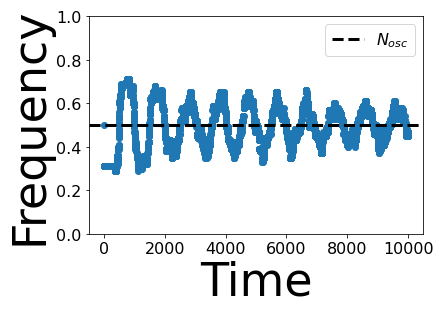

In [180]:
t = dataframe_model['Time']
fplot_iso(t, frequency(pref))
plt.axhline(y=0.5, color = 'black', linestyle = 'dashed', label = '$N_{osc}$', linewidth = 3)
plt.legend()
plt.savefig(f'./plots/iso/plotf_iso_b=0.8_beta=20_rho=0.7_realism=true.pdf', bbox_inches='tight')
#plt.yticks(ticks = np.arange(0, 1.1, step = 0.1))

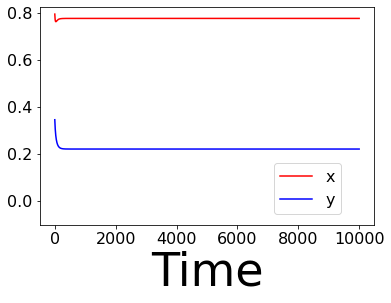

In [113]:
x0 = []
y0 = []
t = dataframe_model['Time']
for i in range(len(dataframe_model['x'])):
    x0.append(dataframe_model['x'][i][0])
    y0.append(dataframe_model['y'][i][0])
xyplot_isolated(t, x0, y0)

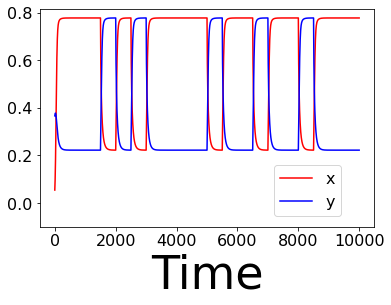

In [122]:
x1 = []
y1 = []
t = dataframe_model['Time']
for i in range(len(dataframe_model['x'])):
    x1.append(dataframe_model['x'][i][1])
    y1.append(dataframe_model['y'][i][1])
xyplot_isolated(t, x1, y1)


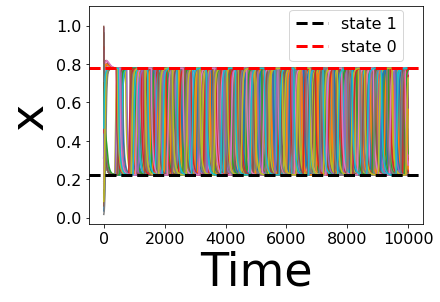

In [181]:
for k in range(N):
    x_k = []
    for i in range(len(dataframe_model['x'])):
        x_k.append(dataframe_model['x'][i][k])
    plt.plot(dataframe_model['Time'], x_k)

plt.axhline(y=x_iso_1, color = 'black', linestyle = 'dashed', label = 'state 1', linewidth = 3)
plt.axhline(y=x_iso_0, color = 'red', linestyle = 'dashed', label = 'state 0', linewidth = 3)
#plt.axhline(y=x_lim_1, color = 'orange', linestyle = 'dashed', label = 'state 1', linewidth = 3)
#plt.axhline(y=x_lim_0, color = 'green', linestyle = 'dashed', label = 'state 0', linewidth = 3)
plt.xlabel('Time')
plt.ylabel('x')
plt.legend(loc = (0.6, 0.75))
plt.axis(ymax=1.1)
plt.savefig(f'./plots/iso/x_fct_t_with_b=0.8_beta=20_rho=0.7_realism=true.pdf', bbox_inches='tight')

In [30]:
agents_x_0 = 0
x_f = model.datacollector.get_model_vars_dataframe().reset_index()['x'][4999]
for i in range(N):
    if x_f[i] < 0.5:
        agents_x_0 += 1
print(agents_x_0)

14


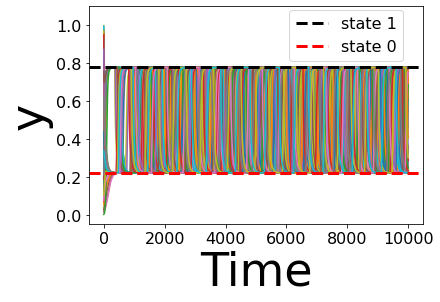

In [182]:
for k in range(N):
    y_k = []
    for i in range(len(dataframe_model['y'])):
        y_k.append(dataframe_model['y'][i][k])
    plt.plot(dataframe_model['Time'], y_k)
plt.axhline(y=y_iso_1, color = 'black', linestyle = 'dashed', label = 'state 1', linewidth = 3)
plt.axhline(y=y_iso_0, color = 'red', linestyle = 'dashed', label = 'state 0', linewidth = 3)
#plt.axhline(y=y_lim_1, color = 'black', linestyle = 'dashed', label = 'state 1', linewidth = 3)
#plt.axhline(y=y_lim_0, color = 'red', linestyle = 'dashed', label = 'state 0', linewidth = 3)
plt.xlabel('Time')
plt.ylabel('y')
plt.axis(ymax = 1.1)
plt.legend(loc = (0.6, 0.75))
plt.savefig(f'./plots/iso/y_fct_t_with_b=0.8_beta=20_rho=0.7_realism=true.pdf', bbox_inches='tight')

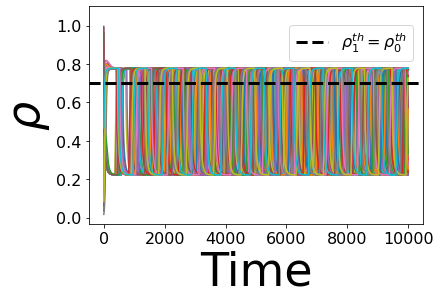

In [183]:
for k in range(N):
    rho_k = []
    for i in range(len(dataframe_model['Rho'])):
        rho_k.append(dataframe_model['Rho'][i][k])
    plt.plot(dataframe_model['Time'], rho_k)
plt.axhline(y=rho_1, color = 'black', linestyle = 'dashed', label = '$\\rho_1^{th} =\\rho_0^{th} $', linewidth = 3)
plt.xlabel('Time')
plt.ylabel('$\\rho$')
plt.legend(loc = (0.6, 0.75))
plt.axis(ymax=1.1)
plt.savefig(f'./plots/iso/plot_osc_rho_iso_b=0.8_beta=20_rho=0.7_realism=true.pdf', bbox_inches='tight')

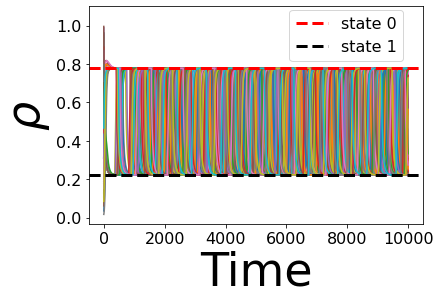

In [184]:
for k in range(N):
    rho_k = []
    for i in range(len(dataframe_model['Rho'])):
        rho_k.append(dataframe_model['Rho'][i][k])
    plt.plot(dataframe_model['Time'], rho_k)
plt.axhline(y=rho_iso_exp_0, color = 'red', linestyle = 'dashed', label = 'state 0', linewidth = 3)
plt.axhline(y=rho_iso_exp_1, color = 'black', linestyle = 'dashed', label = 'state 1', linewidth = 3)

plt.xlabel('Time')
plt.ylabel('$\\rho$')
plt.axis(ymax = 1.1)
plt.legend(loc = (0.6, 0.75))
plt.savefig(f'./plots/iso/plotrho_iso_b=0.8_beta=20_rho=0.7_realism=true.pdf', bbox_inches='tight')

In [190]:
a_0 = np.exp(10*(2*1.4-2))
a_1 = np.exp(10*(2*0.4-2))
print(a_0,a_1)

2980.957987041723 6.14421235332821e-06


For mean field

In [218]:
#FOR MF
N_1 = []
rho = []
x_mf = []
y_mf = []
for i in range(num_steps):
    N_1.append(sum(dataframe_model['Preferences'][i]))
    x_mf.append(s * (N*(b_00-1/3) - N_1[i]/3) / (2*b_00-1))
    y_mf.append(s * (N*(b_00-2/3) + N_1[i]/3) / (2*b_00-1))
    rho.append(x_mf[i] / A)
N_1_th = -3*P*A/2/s * (2*b_00-1) + (3*b_00-1)*N 

In [197]:
print(N_1_th / N)

0.7953481012293645


93.07256118578559


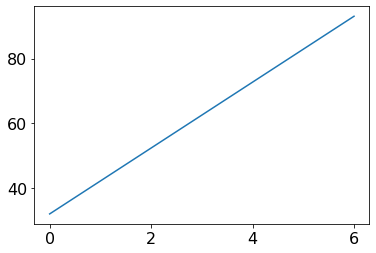

In [202]:
ps = np.linspace(0,6,num=25)
N_1s = [-3*p*A/2/s * (2*0.44-1) + (3*0.44-1)*N for p in ps]
plt.plot(ps,N_1s)
print(N_1s[-1])

In [96]:
P_t = 2
b_t = 0.1
N_1_th = -3*P_t*A/2/s * (2*b_t-1) + (3*b_t-1)*N 
print(N_1_th / N) #only good values (for P=2) for b_00 in [0.3;0.7]

0.6571680263507906


In [6]:
def frequency(preferences):
    freqs = []
    for i in range(len(preferences)):
        freqs.append(sum(preferences[i]) / N)
    return freqs

In [110]:
pref = dataframe_model['Preferences']
frequency(pref)[-1]

1.0

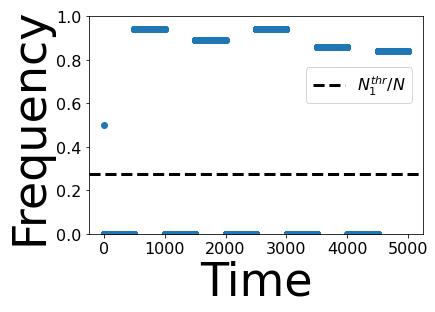

In [220]:
t = dataframe_model['Time']
fplot_mf(t, frequency(pref))
plt.axhline(y=N_1_th/N, color = 'black', linestyle = 'dashed', label = '$N_1^{thr}/N$', linewidth = 3)
plt.legend(loc=(0.65,0.6))
plt.savefig(f'./plots/mf/plotf_mf_b=0.56_P=4_beta={beta}.pdf', bbox_inches='tight')

STD function as $\beta$

In [100]:
sample_f =[]
n_sim = 3
betas_1 = np.linspace(0,2, num = 6)
betas_2 = np.linspace(2,4, num = 15)
betas_3 = np.linspace(4,9, num = 12)
betas = np.concatenate((betas_1, betas_2, betas_3))
std_fs = np.zeros((len(betas), n_sim))

for k in range(n_sim):
    for j,beta in enumerate(betas):
        initial_states = []
        N = 100 # Number of agents
        num_steps = 5000
        vector_x = np.random.rand(N)
        vector_y = np.random.rand(N)
        for i in range(N): 
            initial_states.append({'x' : vector_x[i], 
                                 'y' : vector_y[i], 
                                 'configuration' : 'line', # modify square for regular lattice
                                 'fluctuation' : False, 
                                 'realism' : False,
                                 'radius' : 1.,
                                 'frequency' : 50, # number of agent in state 1 
                                 'b' : np.array([[0.8, 0.2], [0.2, 0.8]]), #[[x^2, xy], [xy, y^2]]
                                 'beta' : beta, #beta = 10 smoothest curves for iso, =.1 for mf 
                                 'rho_0' : 1, 'rho_1' : 1,
                                 'T' : 500,
                                 'Q' : 1, 'S_factor' : 1, 'a' : 1, 'gamma_e' : 1,
                                 'y_thr' : 1, 
                                 'dt' : 0.1})
        model_test = AMSModel(x_max=3, y_max=3, max_steps=num_steps, model_type='mean field', initial_agents=N, initial_states=initial_states, seed = k)
        for i in tqdm(range(num_steps)):    
            model_test.step()
        dataframe_model_test = model_test.datacollector.get_model_vars_dataframe().reset_index()

        pref = dataframe_model_test['Preferences']
        """
        for i in range(int(num_steps/500)): # num_steps/T
            sample_f.append(frequency(pref)[i+500])
        """
        std_fs[j][k] = np.std(frequency(pref))
    print(f'num sim = {k} /{num_sim} , beta = {j} /{len(betas)}')


 17%|█▋        | 870/5000 [00:09<00:44, 93.50it/s] 


KeyboardInterrupt: 

In [36]:
stds_fs_mean = np.mean(std_fs, axis = 1)
stds_fs_std = np.std(std_fs, axis = 1)

In [46]:
print(stds_fs_mean)

[0.03596421 0.04624673 0.0563242  0.05109338 0.03821608 0.02933079
 0.03140402 0.02589677 0.02489158 0.02537561 0.02117241 0.01859782
 0.01627246 0.0153632  0.01290145 0.0116154  0.01148786 0.01138638
 0.01098906 0.00997883 0.00986476 0.00986476 0.00899356 0.00796294
 0.00761196 0.0072694  0.0072694  0.00707036 0.00707036 0.00707036
 0.00707036 0.00707036 0.00707036]


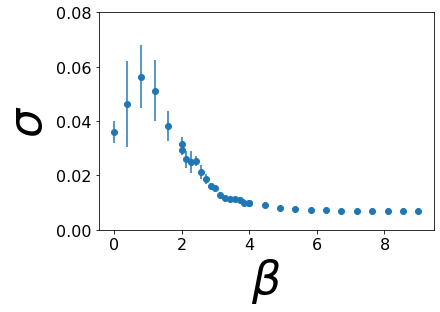

In [54]:
plt.errorbar(x=betas, y=stds_fs_mean, yerr=stds_fs_std, fmt='o')
#plt.scatter(betas, stds_fs_mean)
plt.xlabel('$\\beta$')
plt.ylabel('$\\sigma$') #std
plt.yticks(np.arange(0,0.09, step=0.02))
plt.savefig(f'./plots/mf/plot_stdf_mean_fct_beta_with_errorbars.pdf', bbox_inches='tight') # maybe final time not long enough to have proper convergence so figure might be wrong for small betas 

Autocorrelation as function of beta

In [109]:
sample_f =[]
n_sim = 1
betas_1 = np.linspace(0,2, num = 8)
betas_2 = np.linspace(2,4, num = 12)
betas_3 = np.linspace(4,7, num = 9)
betas = np.concatenate((betas_1, betas_2, betas_3))
acl_fs = np.zeros((len(betas), n_sim))

for k in range(n_sim):
    for j,beta in enumerate(betas):
        print(f'num sim = {k+1} /{n_sim} , beta = {j+1} /{len(betas)}')
        initial_states = []
        N = 100 # Number of agents
        num_steps = 5000
        vector_x = np.random.rand(N)
        vector_y = np.random.rand(N)
        for i in range(N): 
            initial_states.append({'x' : vector_x[i], 
                                 'y' : vector_y[i], 
                                 'configuration' : 'line', # modify square for regular lattice
                                 'fluctuation' : False, 
                                 'realism' : False,
                                 'radius' : 1.,
                                 'frequency' : 50, # number of agent in state 1 
                                 'b' : np.array([[0.8, 0.2], [0.2, 0.8]]), #[[x^2, xy], [xy, y^2]]
                                 'beta' : beta, #beta = 10 smoothest curves for iso, =.1 for mf 
                                 'rho_0' : 1, 'rho_1' : 1,
                                 'T' : 500,
                                 'Q' : 1, 'S_factor' : 1, 'a' : 1, 'gamma_e' : 1,
                                 'y_thr' : 1, 
                                 'dt' : 0.1})
        model_test = AMSModel(x_max=3, y_max=3, max_steps=num_steps, model_type='mean field', initial_agents=N, initial_states=initial_states, seed = k)
        for i in tqdm(range(num_steps)):    
            model_test.step()
        dataframe_model_test = model_test.datacollector.get_model_vars_dataframe().reset_index()

        pref = dataframe_model_test['Preferences']
        acl_fs[j][k] = sm.tsa.acf(frequency(pref)[0:5000:500], nlags=1)[1] # take lag 1
    


  0%|          | 7/5000 [00:00<01:14, 67.29it/s]

num sim = 1 /1 , beta = 1 /29


100%|██████████| 5000/5000 [01:17<00:00, 64.33it/s]
C:\Users\Adridrou\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
  0%|          | 18/5000 [00:00<01:05, 76.64it/s]

num sim = 1 /1 , beta = 2 /29


  0%|          | 8/5000 [00:00<01:11, 70.07it/s]

num sim = 1 /1 , beta = 3 /29


  0%|          | 8/5000 [00:00<01:09, 72.15it/s]

num sim = 1 /1 , beta = 4 /29


  0%|          | 7/5000 [00:00<01:19, 62.70it/s]

num sim = 1 /1 , beta = 5 /29


  0%|          | 15/5000 [00:00<01:11, 69.33it/s]

num sim = 1 /1 , beta = 6 /29


  0%|          | 14/5000 [00:00<01:15, 66.00it/s]

num sim = 1 /1 , beta = 7 /29


  0%|          | 7/5000 [00:00<01:16, 64.90it/s]

num sim = 1 /1 , beta = 8 /29


  0%|          | 7/5000 [00:00<01:20, 62.22it/s]

num sim = 1 /1 , beta = 9 /29


  0%|          | 8/5000 [00:00<01:09, 72.23it/s]

num sim = 1 /1 , beta = 10 /29


  0%|          | 7/5000 [00:00<01:17, 64.02it/s]

num sim = 1 /1 , beta = 11 /29


  0%|          | 6/5000 [00:00<01:35, 52.50it/s]

num sim = 1 /1 , beta = 12 /29


  0%|          | 6/5000 [00:00<01:33, 53.35it/s]

num sim = 1 /1 , beta = 13 /29


  0%|          | 13/5000 [00:00<01:22, 60.20it/s]

num sim = 1 /1 , beta = 14 /29


  0%|          | 8/5000 [00:00<01:11, 69.70it/s]

num sim = 1 /1 , beta = 15 /29


  0%|          | 7/5000 [00:00<01:14, 67.29it/s]

num sim = 1 /1 , beta = 16 /29


  0%|          | 16/5000 [00:00<01:09, 71.53it/s]

num sim = 1 /1 , beta = 17 /29


  0%|          | 8/5000 [00:00<01:08, 73.26it/s]

num sim = 1 /1 , beta = 18 /29


  0%|          | 7/5000 [00:00<01:16, 65.05it/s]

num sim = 1 /1 , beta = 19 /29


  0%|          | 7/5000 [00:00<01:18, 63.46it/s]

num sim = 1 /1 , beta = 20 /29


  0%|          | 6/5000 [00:00<01:44, 47.84it/s]

num sim = 1 /1 , beta = 21 /29


  0%|          | 7/5000 [00:00<01:12, 69.09it/s]

num sim = 1 /1 , beta = 22 /29


  0%|          | 11/5000 [00:00<01:32, 53.67it/s]

num sim = 1 /1 , beta = 23 /29


  0%|          | 7/5000 [00:00<01:17, 64.09it/s]

num sim = 1 /1 , beta = 24 /29


  0%|          | 10/5000 [00:00<01:42, 48.46it/s]

num sim = 1 /1 , beta = 25 /29


  0%|          | 16/5000 [00:00<01:06, 74.55it/s]

num sim = 1 /1 , beta = 26 /29


  0%|          | 15/5000 [00:00<01:08, 73.16it/s]

num sim = 1 /1 , beta = 27 /29


  0%|          | 6/5000 [00:00<01:36, 51.85it/s]

num sim = 1 /1 , beta = 28 /29


  0%|          | 9/5000 [00:00<01:09, 72.11it/s]

num sim = 1 /1 , beta = 29 /29


100%|██████████| 5000/5000 [01:17<00:00, 64.77it/s]


In [110]:
acl_fs_mean = np.mean(acl_fs, axis = 1)
acl_fs_std = np.std(acl_fs, axis = 1)

Text(0, 0.5, 'ACF')

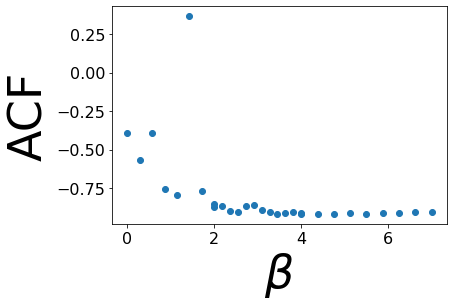

In [111]:
#plt.scatter(betas, acl_fs_mean)
plt.errorbar(x=betas, y=acl_fs_mean, yerr=acl_fs_std, fmt='o')
plt.xlabel('$\\beta$')
plt.ylabel('ACF') # autocorrelation
#plt.axis(ymin=-1, ymax=0)
#plt.savefig(f'./plots/mf/plot_autocorr_mean_fct_beta_with_errorbars.pdf', bbox_inches='tight')

STD function as P^th 

In [8]:
initial_states = []
P = 3
N = 100 # Number of agents
num_steps = 5000
vector_x = np.random.rand(N)
vector_y = np.random.rand(N)
for i in range(N): 
    initial_states.append({'x' : vector_x[i], 
                         'y' : vector_y[i], 
                         'configuration' : 'line', # modify square for regular lattice
                         'fluctuation' : False, 
                         'realism' : False,
                         'radius' : 1.,
                         'frequency' : 50, # number of agent in state 1 
                         'b' : np.array([[0.8, 0.2], [0.2, 0.8]]), #[[x^2, xy], [xy, y^2]]
                         'beta' : 8, #beta = 10 for deterministic result 
                         'rho_0' : P/2, 'rho_1' : P/2,
                         'T' : 500,
                         'Q' : 1, 'S_factor' : 1, 'a' : 1, 'gamma_e' : 1,
                         'y_thr' : 1, 
                         'dt' : 0.1})
model_test = AMSModel(x_max=3, y_max=3, max_steps=num_steps, model_type='mean field', initial_agents=N, initial_states=initial_states, seed = 1)
for i in tqdm(range(num_steps)):    
    model_test.step()
dataframe_model_test = model_test.datacollector.get_model_vars_dataframe().reset_index()

100%|██████████| 5000/5000 [01:12<00:00, 69.22it/s]


In [9]:
b_00 = initial_states[0]['b'][0][0]
b_01 = initial_states[0]['b'][0][1]
b_10 = initial_states[0]['b'][1][0]
b_11 = initial_states[0]['b'][1][1]
beta = initial_states[0]['beta']
T = initial_states[0]['T']
s = initial_states[0]['Q']
A = model_test.schedule.agents[0].A

In [101]:
# Conditions on P & b00
b_test = 0.8
A_2 = np.pi * (3**2 + 3**2)
l_b = max(0, 2*s*N/3/A * (3*b_test-2)/(2*b_test-1))
u_b = 2*s*N/3/A * (3*b_test-1)/(2*b_test-1)
print(f'P can take values between {l_b} < P < {u_b}')
# works for b_00 = 0.2, x_max = y_max = 3 and P = 2

P can take values between 0.7859503362562739 < P < 2.750826176896957


In [10]:
#FOR MF
N_1 = []
rho = []
x_mf = []
y_mf = []
for i in range(num_steps):
    N_1.append(sum(dataframe_model_test['Preferences'][i]))
    x_mf.append(s * (((b_11 + b_01) * (2/3 * N - 1/3 * N_1[i]) - b_01 * N) / (b_00*b_11 - b_01*b_10)))
    y_mf.append(s * ((N * b_00 - (b_00 + b_10) * (2/3 * N - 1/3 * N_1[i]))) / (b_00*b_11 - b_01*b_10))
    rho.append(x_mf[i] / A)
N_1_th = -3*P*A/2/s * (2*b_00-1) - (1-3*b_00)*N  # issue if P too small (P ~< 0.8): N_1 > N

In [11]:
pref_test = dataframe_model_test['Preferences']

In [12]:
print(N_1_th / N)

-0.12681402964463928


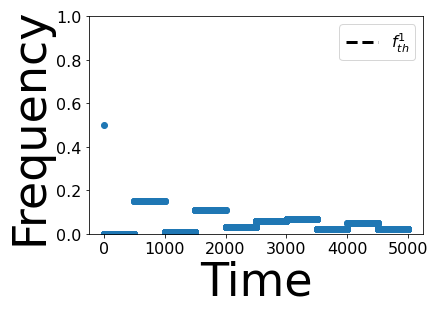

In [13]:
t = dataframe_model_test['Time']
fplot_mf(t, frequency(pref_test))
plt.axhline(y=N_1_th/N, color = 'black', linestyle = 'dashed', label = '$f_{th}^1$', linewidth = 3)
plt.legend()
#plt.savefig(f'./plots/mf/plotf_mf_P={P}.pdf', bbox_inches='tight')

In [395]:
sample_f =[]
Ps_1 = np.linspace(0.8, 1, num=5)
Ps_2 = np.linspace(1, 2.5, num = 10)
Ps_3 = np.linspace(2.5,2.7, num = 5)
Ps = np.concatenate((Ps_1, Ps_2, Ps_3))
std_fs = []
mean_fs = []
for P in Ps:
    initial_states = []
    N = 100 # Number of agents
    num_steps = 5000
    vector_x = np.random.rand(N)
    vector_y = np.random.rand(N)
    for i in range(N): 
        initial_states.append({'x' : vector_x[i], 
                             'y' : vector_y[i], 
                             'configuration' : 'line', # modify square for regular lattice
                             'fluctuation' : False, 
                             'realism' : False,
                             'radius' : 1.,
                             'frequency' : 50, # number of agent in state 1 
                             'b' : np.array([[0.8, 0.2], [0.2, 0.8]]), #[[x^2, xy], [xy, y^2]]
                             'beta' : 10, #beta = 10 smoothest curves for iso, =.1 for mf 
                             'rho_0' : P/2, 'rho_1' : P/2,
                             'T' : 500,
                             'Q' : 1, 'S_factor' : 1, 'a' : 1, 'gamma_e' : 1,
                             'y_thr' : 1, 
                             'dt' : 0.1})
    model_test = AMSModel(x_max=3, y_max=3, max_steps=num_steps, model_type='mean field', initial_agents=N, initial_states=initial_states, seed = 1)
    for i in tqdm(range(num_steps)):    
        model_test.step()
    dataframe_model_test = model_test.datacollector.get_model_vars_dataframe().reset_index()
    
    pref = dataframe_model_test['Preferences']
    """
    for i in range(int(num_steps/500)): # num_steps/T
        sample_f.append(frequency(pref)[i+500])
    """
    mean_fs.append(np.mean(frequency(pref)))
    std_fs.append(np.std(frequency(pref)))

100%|██████████| 5000/5000 [00:48<00:00, 102.76it/s]


ACF function of P^th

In [18]:
sample_f =[]
Ps_1 = np.linspace(0.8, 1, num=5)
Ps_2 = np.linspace(1, 2.5, num = 10)
Ps_3 = np.linspace(2.5,2.7, num = 5)
Ps = np.concatenate((Ps_1, Ps_2, Ps_3))
acf_fs = []
mean_fs = []
for P in Ps:
    initial_states = []
    N = 100 # Number of agents
    num_steps = 5000
    vector_x = np.random.rand(N)
    vector_y = np.random.rand(N)
    for i in range(N): 
        initial_states.append({'x' : vector_x[i], 
                             'y' : vector_y[i], 
                             'configuration' : 'line', # modify square for regular lattice
                             'fluctuation' : False, 
                             'realism' : False,
                             'radius' : 1.,
                             'frequency' : 50, # number of agent in state 1 
                             'b' : np.array([[0.8, 0.2], [0.2, 0.8]]), #[[x^2, xy], [xy, y^2]]
                             'beta' : 10, #beta = 10 smoothest curves for iso, =.1 for mf 
                             'rho_0' : P/2, 'rho_1' : P/2,
                             'T' : 500,
                             'Q' : 1, 'S_factor' : 1, 'a' : 1, 'gamma_e' : 1,
                             'y_thr' : 1, 
                             'dt' : 0.1})
    model_test = AMSModel(x_max=3, y_max=3, max_steps=num_steps, model_type='mean field', initial_agents=N, initial_states=initial_states, seed = 1)
    for i in tqdm(range(num_steps)):    
        model_test.step()
    dataframe_model_test = model_test.datacollector.get_model_vars_dataframe().reset_index()
    
    pref = dataframe_model_test['Preferences']
    """
    for i in range(int(num_steps/500)): # num_steps/T
        sample_f.append(frequency(pref)[i+500])
    """
    acf_fs.append(sm.tsa.acf(frequency(pref)[0:5000:500], nlags=1)[1]) # take lag 1

100%|██████████| 5000/5000 [01:14<00:00, 67.27it/s] 
C:\Users\Adridrou\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
100%|██████████| 5000/5000 [01:21<00:00, 61.69it/s] 


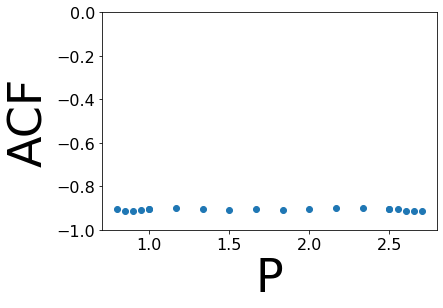

In [26]:
plt.scatter(Ps, acf_fs)
plt.axis(ymax=0, ymin=-1)
plt.xlabel('P')
plt.ylabel('ACF')
plt.savefig(f'./plots/mf/plot_autocorr_fct_P.pdf', bbox_inches='tight')

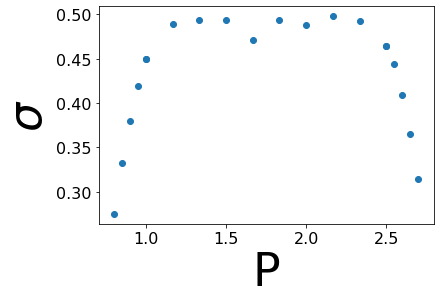

In [396]:
plt.scatter(Ps, std_fs)
plt.xlabel('P')
plt.ylabel('$\\sigma$') #std
plt.savefig(f'./plots/mf/plot_stdf_fct_Ps.pdf', bbox_inches='tight')

Convergence for different betas

In [128]:
sample_f =[]
n_sim = 5
betas = np.linspace(2,10, num = 15)
std_fs = np.zeros((len(betas), n_sim))
epsilon = 0.01
N_fs = np.zeros((len(betas), n_sim))
for k in range(n_sim):
    for j,beta in enumerate(betas):
        L = True        
        f_0 = 0
        f_1 = 1
        initial_states = []
        N = 100 # Number of agents
        num_steps = 10000
        vector_x = np.random.rand(N)
        vector_y = np.random.rand(N)
        for i in range(N): 
            initial_states.append({'x' : vector_x[i], 
                                 'y' : vector_y[i], 
                                 'configuration' : 'line', # modify square for regular lattice
                                 'fluctuation' : False, 
                                 'realism' : False,
                                 'radius' : 1.,
                                 'frequency' : 50, # number of agent in state 1 
                                 'b' : np.array([[0.8, 0.2], [0.2, 0.8]]), #[[x^2, xy], [xy, y^2]]
                                 'beta' : beta, #beta = 10 smoothest curves for iso, =.1 for mf 
                                 'rho_0' : 1, 'rho_1' : 1,
                                 'T' : 500,
                                 'Q' : 1, 'S_factor' : 1, 'a' : 1, 'gamma_e' : 1,
                                 'y_thr' : 1, 
                                 'dt' : 0.1})
        model_test = AMSModel(x_max=3, y_max=3, max_steps=num_steps, model_type='mean field', initial_agents=N, initial_states=initial_states, seed = k)
        while L:
            for i in tqdm(range(num_steps)):
                model_test.step()
                if model_test.schedule.steps % 1000 == 0: # 2*T
                    f_1 = sum(model_test.get_preferences())/N
                    if np.abs(f_1 - f_0) < epsilon:
                        N_fs[j][k] = model_test.schedule.steps - 1000 # -1000 ?    
                        #print(f'N={model_test.schedule.steps}, beta = {beta}, convergence = yes' )
                        L = False
                        break
                        
                    else:
                        f_0 = f_1 
                if model_test.schedule.steps == num_steps: # if no convergence
                    N_fs[j][k] = model_test.schedule.steps 
                    #print(f'N={model_test.schedule.steps}, beta = {beta}, convergence = no' )
                    L = False

 30%|██▉       | 2999/10000 [00:46<01:47, 65.19it/s]


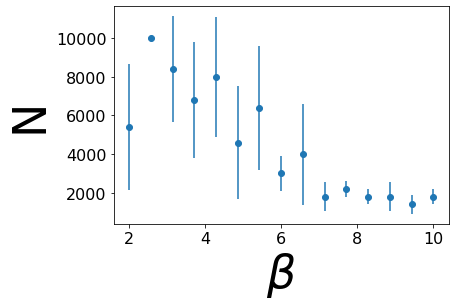

In [130]:
N_fs_mean = np.mean(N_fs, axis = 1)
N_fs_std = np.std(N_fs, axis = 1)
plt.errorbar(x=betas, y=N_fs_mean, yerr=N_fs_std, fmt='o')
plt.xlabel('$\\beta$')
plt.ylabel('N')
#plt.axis(ymin=2000, ymax=10000)
plt.savefig(f'./plots/mf/plot_conv_beta.pdf', bbox_inches='tight')

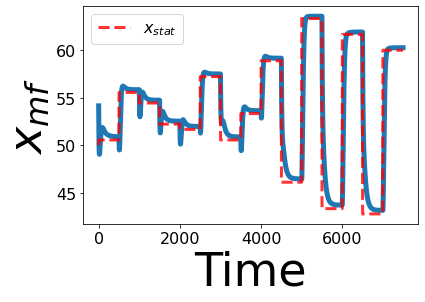

In [101]:
plt.plot(dataframe_model['Time'], dataframe_model['Total x'], lw =5)
plt.plot(dataframe_model['Time'], x_mf, color = 'red', linestyle = 'dashed', label = '$x_{stat} $', linewidth = 3, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('$x_{mf}$')
plt.legend(loc = 'best')
#plt.savefig(f'./plots/mf/plotx_mf_b=0.8_P=2_steps=7500_beta={beta}.pdf', bbox_inches='tight')

(-374.95000000000005, 7873.95, -0.0339206494311417, 1.1)

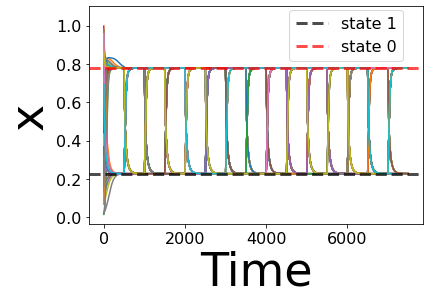

In [102]:
for k in range(N):
    x_k = []
    for i in range(len(dataframe_model['x'])):
        x_k.append(dataframe_model['x'][i][k])
    plt.plot(dataframe_model['Time'], x_k)

plt.axhline(y=x_iso_1, color = 'black', linestyle = 'dashed', label = 'state 1', linewidth = 3, alpha=0.7)
plt.axhline(y=x_iso_0, color = 'red', linestyle = 'dashed', label = 'state 0', linewidth = 3, alpha=0.7)
#plt.axhline(y=x_lim_1, color = 'orange', linestyle = 'dashed', label = 'state 1', linewidth = 3)
#plt.axhline(y=x_lim_0, color = 'green', linestyle = 'dashed', label = 'state 0', linewidth = 3)
plt.xlabel('Time')
plt.ylabel('x')
plt.legend(loc = (0.6, 0.75))
plt.axis(ymax=1.1)
#plt.savefig(f'./plots/mf/plot_all_x_b=0.8_P=2_steps=7500_beta={beta}.pdf', bbox_inches='tight')

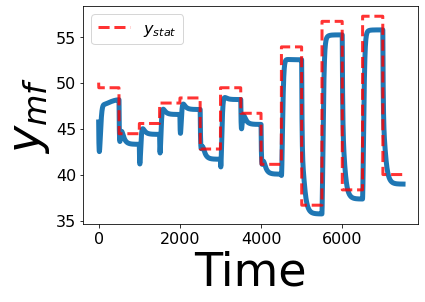

In [103]:
plt.plot(dataframe_model['Time'], dataframe_model['Total y'], lw =5)
plt.plot(dataframe_model['Time'], y_mf, color = 'red', linestyle = 'dashed', label = '$y_{stat} $', linewidth = 3, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('$y_{mf}$')
plt.legend(loc = 'best')
#plt.savefig(f'./plots/mf/ploty_mf_b=0.8_P=2_steps=7500_beta={beta}.pdf', bbox_inches='tight')

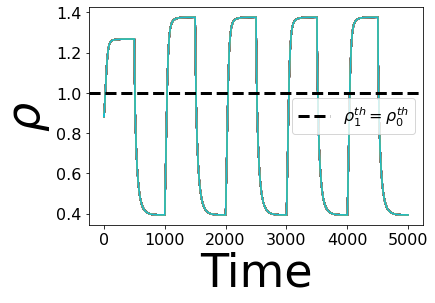

In [224]:
for k in range(N):
    rho_k = []
    for i in range(len(dataframe_model['Rho'])):
        rho_k.append(dataframe_model['Rho'][i][k])
    plt.plot(dataframe_model['Time'], rho_k)
plt.axhline(y=rho_1, color = 'black', linestyle = 'dashed', label = '$\\rho_1^{th} =\\rho_0^{th} $', linewidth = 3)
#plt.axhline(y=rho_0, color = 'red', linestyle = 'dashed', label = '$\\rho_0^{th}$', linewidth = 3)
plt.xlabel('Time')
plt.ylabel('$\\rho$')
plt.legend(loc = 'best')
#plt.savefig(f'./plots/mf/plotrho_osc_mf_b=({b_00},{b_01},{b_10},{b_11}).pdf', bbox_inches='tight')

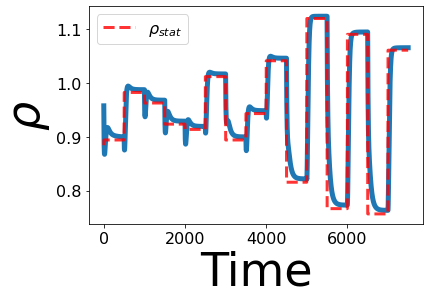

In [104]:
rho_k = []
for i in range(len(dataframe_model['Rho'])):
    rho_k.append(dataframe_model['Rho'][i][k])
plt.plot(dataframe_model['Time'], rho_k, lw = 5)
plt.plot(dataframe_model['Time'], rho, color = 'red', linestyle = 'dashed', label = '$\\rho_{stat} $', linewidth = 3, alpha =0.8)
plt.xlabel('Time')
plt.ylabel('$\\rho$')
plt.legend(loc = 'best')
#plt.savefig(f'./plots/mf/plotrho_mf_b=0.8_P=2_steps=7500_beta={beta}.pdf', bbox_inches='tight')

Text(0, 0.5, 'p(1)')

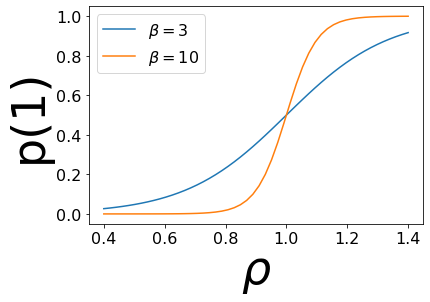

In [107]:
rho_th = 2
betas = [3,10]
x = np.linspace(0.4, 1.4, num=50)
for beta in betas:
    f = [np.exp(beta*(y-rho_th/2))/((np.exp(beta*(y-rho_th/2))) + np.exp(-beta*(y-rho_th/2))) for y in x]
    plt.plot(x,f)
plt.legend(labels=['$\\beta=3$', '$\\beta=10$'])
plt.xlabel('$\\rho$')
plt.ylabel('p(1)')
#plt.savefig(f'./plots/mf/p1.pdf', bbox_inches='tight')

Phase diagram

In [17]:
N = 100 # Number of agents
num_steps = 10000
s = 1
x = 3
y = 3
A = np.pi * (x**2 + y**2)
b_00s = np.linspace(0,1,num=10)
Ps = np.linspace(0, 6, num=10)
final_freqs = np.zeros((len(Ps), len(b_00s)))
final_amps = np.zeros((len(Ps), len(b_00s)))
osc = np.zeros((len(Ps), len(b_00s)))
mask = np.zeros_like(final_freqs)
for j, b in enumerate(b_00s):
    #setting the boundaries for P
    if b < 1/2:
        up_bound = 2*s*N/3/A * (3*b-2)/(2*b-1)
        low_bound = max(2*s*N/3/A * (3*b-1)/(2*b-1), 0)
    elif b > 1/2:
        up_bound = 2*s*N/3/A * (3*b-1)/(2*b-1)
        low_bound = max(2*s*N/3/A * (3*b-2)/(2*b-1), 0)
    else:
        print('Division by 0 !')
        break
        
    for k, p in enumerate(Ps):        
        if p > up_bound or p < low_bound:
            mask[k][j] = True
        else:            
            initial_states = []
            vector_x = np.random.rand(N)
            vector_y = np.random.rand(N)
            for i in range(N): 
                initial_states.append({'x' : vector_x[i], 
                                     'y' : vector_y[i], 
                                     'configuration' : 'line', # modify square for regular lattice
                                     'fluctuation' : False, 
                                     'realism' : False,
                                     'radius' : 1.,
                                     'frequency' : 50, # number of agent in state 1 
                                     'b' : np.array([[b, 1-b], [1-b, b]]), #[[x^2, xy], [xy, y^2]]
                                     'beta' : 2, # beta > 7 for deterministic + fast convergence
                                     'rho_0' : p/2, 'rho_1' : p/2,
                                     'T' : 500,
                                     'Q' : 1, 'S_factor' : 1, 'a' : 1, 'gamma_e' : 1,
                                     'y_thr' : 1, 
                                     'dt' : 0.1})
            model = AMSModel(x_max=x, y_max=y, max_steps=num_steps, model_type='mean field', initial_agents=N, initial_states=initial_states, seed = 1)
            for _ in tqdm(range(num_steps)):    
                model.step()
            dataframe_model = model.datacollector.get_model_vars_dataframe().reset_index()
            pref = dataframe_model['Preferences']
            freqs = frequency(pref)
            final_freqs[k][j] = max(freqs[num_steps-1],freqs[num_steps-501])
            if abs(freqs[num_steps-1]-freqs[num_steps-501]) >= 0.1:
                final_amps[k][j] = abs(freqs[num_steps-1]-freqs[num_steps-501])
                osc[k][j] = True
        print(f'b_00 = {b}, P = {p}, k = {k}/{len(Ps)-1}, j={j}/{len(b_00s)-1}, f={final_freqs[k][j]}, mask={mask[k][j]}')

  0%|          | 8/10000 [00:00<02:29, 66.81it/s]

b_00 = 0.0, P = 0.0, k = 0/9, j=0/9, f=0.0, mask=1.0
b_00 = 0.0, P = 0.6666666666666666, k = 1/9, j=0/9, f=0.0, mask=1.0


  1%|          | 66/10000 [00:01<02:26, 67.58it/s]C:\Users\Adridrou\Documents\Unif\ETHZ\Cours\Master_spring_2021\Projet\Implementation\agent.py:106: RuntimeWarning: overflow encountered in double_scalars
  - self.b[0][1] * x * self.y
C:\Users\Adridrou\Documents\Unif\ETHZ\Cours\Master_spring_2021\Projet\Implementation\agent.py:106: RuntimeWarning: invalid value encountered in double_scalars
  - self.b[0][1] * x * self.y
C:\Users\Adridrou\Documents\Unif\ETHZ\Cours\Master_spring_2021\Projet\Implementation\agent.py:126: RuntimeWarning: overflow encountered in double_scalars
  - self.b[1][0] * self.x * y
C:\Users\Adridrou\Documents\Unif\ETHZ\Cours\Master_spring_2021\Projet\Implementation\agent.py:126: RuntimeWarning: invalid value encountered in double_scalars
  - self.b[1][0] * self.x * y
  0%|          | 5/10000 [00:00<03:33, 46.89it/s]

b_00 = 0.0, P = 1.3333333333333333, k = 2/9, j=0/9, f=0.77, mask=0.0


  0%|          | 5/10000 [00:00<03:23, 49.17it/s]

b_00 = 0.0, P = 2.0, k = 3/9, j=0/9, f=0.41, mask=0.0
b_00 = 0.0, P = 2.6666666666666665, k = 4/9, j=0/9, f=0.0, mask=1.0
b_00 = 0.0, P = 3.333333333333333, k = 5/9, j=0/9, f=0.0, mask=1.0
b_00 = 0.0, P = 4.0, k = 6/9, j=0/9, f=0.0, mask=1.0
b_00 = 0.0, P = 4.666666666666666, k = 7/9, j=0/9, f=0.0, mask=1.0
b_00 = 0.0, P = 5.333333333333333, k = 8/9, j=0/9, f=0.0, mask=1.0
b_00 = 0.0, P = 6.0, k = 9/9, j=0/9, f=0.0, mask=1.0
b_00 = 0.1111111111111111, P = 0.0, k = 0/9, j=1/9, f=0.0, mask=1.0
b_00 = 0.1111111111111111, P = 0.6666666666666666, k = 1/9, j=1/9, f=0.0, mask=1.0


  0%|          | 7/10000 [00:00<02:28, 67.29it/s]

b_00 = 0.1111111111111111, P = 1.3333333333333333, k = 2/9, j=1/9, f=1.0, mask=0.0


  0%|          | 5/10000 [00:00<03:39, 45.56it/s]

b_00 = 0.1111111111111111, P = 2.0, k = 3/9, j=1/9, f=1.0, mask=0.0
b_00 = 0.1111111111111111, P = 2.6666666666666665, k = 4/9, j=1/9, f=0.0, mask=1.0
b_00 = 0.1111111111111111, P = 3.333333333333333, k = 5/9, j=1/9, f=0.0, mask=1.0
b_00 = 0.1111111111111111, P = 4.0, k = 6/9, j=1/9, f=0.0, mask=1.0
b_00 = 0.1111111111111111, P = 4.666666666666666, k = 7/9, j=1/9, f=0.0, mask=1.0
b_00 = 0.1111111111111111, P = 5.333333333333333, k = 8/9, j=1/9, f=0.0, mask=1.0
b_00 = 0.1111111111111111, P = 6.0, k = 9/9, j=1/9, f=0.0, mask=1.0
b_00 = 0.2222222222222222, P = 0.0, k = 0/9, j=2/9, f=0.0, mask=1.0
b_00 = 0.2222222222222222, P = 0.6666666666666666, k = 1/9, j=2/9, f=0.0, mask=1.0


  0%|          | 8/10000 [00:00<02:17, 72.93it/s]

b_00 = 0.2222222222222222, P = 1.3333333333333333, k = 2/9, j=2/9, f=0.89, mask=0.0


  0%|          | 5/10000 [00:00<03:48, 43.79it/s]

b_00 = 0.2222222222222222, P = 2.0, k = 3/9, j=2/9, f=0.91, mask=0.0


  0%|          | 7/10000 [00:00<02:44, 60.57it/s]

b_00 = 0.2222222222222222, P = 2.6666666666666665, k = 4/9, j=2/9, f=0.97, mask=0.0
b_00 = 0.2222222222222222, P = 3.333333333333333, k = 5/9, j=2/9, f=0.0, mask=1.0
b_00 = 0.2222222222222222, P = 4.0, k = 6/9, j=2/9, f=0.0, mask=1.0
b_00 = 0.2222222222222222, P = 4.666666666666666, k = 7/9, j=2/9, f=0.0, mask=1.0
b_00 = 0.2222222222222222, P = 5.333333333333333, k = 8/9, j=2/9, f=0.0, mask=1.0
b_00 = 0.2222222222222222, P = 6.0, k = 9/9, j=2/9, f=0.0, mask=1.0


  0%|          | 6/10000 [00:00<03:06, 53.73it/s]

b_00 = 0.3333333333333333, P = 0.0, k = 0/9, j=3/9, f=0.6, mask=0.0


  0%|          | 9/10000 [00:00<02:03, 80.95it/s]

b_00 = 0.3333333333333333, P = 0.6666666666666666, k = 1/9, j=3/9, f=0.36, mask=0.0


  0%|          | 7/10000 [00:00<02:33, 64.98it/s]

b_00 = 0.3333333333333333, P = 1.3333333333333333, k = 2/9, j=3/9, f=0.57, mask=0.0


  0%|          | 21/10000 [00:00<01:36, 103.30it/s]

b_00 = 0.3333333333333333, P = 2.0, k = 3/9, j=3/9, f=0.89, mask=0.0


  0%|          | 7/10000 [00:00<02:37, 63.59it/s]

b_00 = 0.3333333333333333, P = 2.6666666666666665, k = 4/9, j=3/9, f=0.86, mask=0.0


  0%|          | 18/10000 [00:00<02:00, 82.65it/s]

b_00 = 0.3333333333333333, P = 3.333333333333333, k = 5/9, j=3/9, f=0.92, mask=0.0
b_00 = 0.3333333333333333, P = 4.0, k = 6/9, j=3/9, f=0.0, mask=1.0
b_00 = 0.3333333333333333, P = 4.666666666666666, k = 7/9, j=3/9, f=0.0, mask=1.0
b_00 = 0.3333333333333333, P = 5.333333333333333, k = 8/9, j=3/9, f=0.0, mask=1.0
b_00 = 0.3333333333333333, P = 6.0, k = 9/9, j=3/9, f=0.0, mask=1.0


  0%|          | 23/10000 [00:00<01:44, 95.79it/s] 

b_00 = 0.4444444444444444, P = 0.0, k = 0/9, j=4/9, f=0.63, mask=0.0


  0%|          | 11/10000 [00:00<01:35, 104.65it/s]

b_00 = 0.4444444444444444, P = 0.6666666666666666, k = 1/9, j=4/9, f=0.54, mask=0.0


  0%|          | 19/10000 [00:00<01:48, 92.18it/s]

b_00 = 0.4444444444444444, P = 1.3333333333333333, k = 2/9, j=4/9, f=0.55, mask=0.0


  0%|          | 13/10000 [00:00<02:42, 61.59it/s]

b_00 = 0.4444444444444444, P = 2.0, k = 3/9, j=4/9, f=0.58, mask=0.0


  0%|          | 9/10000 [00:00<01:52, 88.50it/s]

b_00 = 0.4444444444444444, P = 2.6666666666666665, k = 4/9, j=4/9, f=0.59, mask=0.0


  0%|          | 9/10000 [00:00<01:51, 89.98it/s]

b_00 = 0.4444444444444444, P = 3.333333333333333, k = 5/9, j=4/9, f=0.63, mask=0.0


  0%|          | 12/10000 [00:00<01:26, 115.89it/s]

b_00 = 0.4444444444444444, P = 4.0, k = 6/9, j=4/9, f=0.77, mask=0.0


  0%|          | 11/10000 [00:00<01:39, 100.59it/s]

b_00 = 0.4444444444444444, P = 4.666666666666666, k = 7/9, j=4/9, f=0.71, mask=0.0


  0%|          | 7/10000 [00:00<02:25, 68.80it/s]

b_00 = 0.4444444444444444, P = 5.333333333333333, k = 8/9, j=4/9, f=0.25, mask=0.0


  0%|          | 10/10000 [00:00<01:44, 95.47it/s]

b_00 = 0.4444444444444444, P = 6.0, k = 9/9, j=4/9, f=0.15, mask=0.0


  0%|          | 17/10000 [00:00<02:12, 75.41it/s]

b_00 = 0.5555555555555556, P = 0.0, k = 0/9, j=5/9, f=0.73, mask=0.0


  0%|          | 11/10000 [00:00<01:38, 101.89it/s]

b_00 = 0.5555555555555556, P = 0.6666666666666666, k = 1/9, j=5/9, f=0.64, mask=0.0


  0%|          | 7/10000 [00:00<02:53, 57.52it/s]

b_00 = 0.5555555555555556, P = 1.3333333333333333, k = 2/9, j=5/9, f=0.99, mask=0.0


  0%|          | 6/10000 [00:00<02:46, 59.93it/s]

b_00 = 0.5555555555555556, P = 2.0, k = 3/9, j=5/9, f=0.97, mask=0.0


  0%|          | 11/10000 [00:00<01:37, 102.53it/s]

b_00 = 0.5555555555555556, P = 2.6666666666666665, k = 4/9, j=5/9, f=0.91, mask=0.0


  0%|          | 10/10000 [00:00<01:51, 89.30it/s]

b_00 = 0.5555555555555556, P = 3.333333333333333, k = 5/9, j=5/9, f=0.83, mask=0.0


  0%|          | 8/10000 [00:00<02:19, 71.39it/s]

b_00 = 0.5555555555555556, P = 4.0, k = 6/9, j=5/9, f=0.41, mask=0.0


  0%|          | 16/10000 [00:00<02:08, 77.48it/s]

b_00 = 0.5555555555555556, P = 4.666666666666666, k = 7/9, j=5/9, f=0.15, mask=0.0


  0%|          | 4/10000 [00:00<04:29, 37.09it/s]

b_00 = 0.5555555555555556, P = 5.333333333333333, k = 8/9, j=5/9, f=0.11, mask=0.0


  0%|          | 10/10000 [00:00<01:49, 91.40it/s]

b_00 = 0.5555555555555556, P = 6.0, k = 9/9, j=5/9, f=0.03, mask=0.0


  0%|          | 19/10000 [00:00<01:50, 90.10it/s]

b_00 = 0.6666666666666666, P = 0.0, k = 0/9, j=6/9, f=0.89, mask=0.0


  0%|          | 22/10000 [00:00<01:34, 105.53it/s]

b_00 = 0.6666666666666666, P = 0.6666666666666666, k = 1/9, j=6/9, f=0.98, mask=0.0


  0%|          | 8/10000 [00:00<02:20, 71.22it/s]

b_00 = 0.6666666666666666, P = 1.3333333333333333, k = 2/9, j=6/9, f=0.98, mask=0.0


  0%|          | 12/10000 [00:00<01:31, 108.70it/s]

b_00 = 0.6666666666666666, P = 2.0, k = 3/9, j=6/9, f=0.92, mask=0.0


  0%|          | 12/10000 [00:00<02:54, 57.40it/s]

b_00 = 0.6666666666666666, P = 2.6666666666666665, k = 4/9, j=6/9, f=0.81, mask=0.0


  0%|          | 14/10000 [00:00<02:27, 67.66it/s]

b_00 = 0.6666666666666666, P = 3.333333333333333, k = 5/9, j=6/9, f=0.3, mask=0.0
b_00 = 0.6666666666666666, P = 4.0, k = 6/9, j=6/9, f=0.0, mask=1.0
b_00 = 0.6666666666666666, P = 4.666666666666666, k = 7/9, j=6/9, f=0.0, mask=1.0
b_00 = 0.6666666666666666, P = 5.333333333333333, k = 8/9, j=6/9, f=0.0, mask=1.0
b_00 = 0.6666666666666666, P = 6.0, k = 9/9, j=6/9, f=0.0, mask=1.0
b_00 = 0.7777777777777777, P = 0.0, k = 0/9, j=7/9, f=0.0, mask=1.0
b_00 = 0.7777777777777777, P = 0.6666666666666666, k = 1/9, j=7/9, f=0.0, mask=1.0


  0%|          | 11/10000 [00:00<01:31, 108.68it/s]

b_00 = 0.7777777777777777, P = 1.3333333333333333, k = 2/9, j=7/9, f=0.64, mask=0.0


  0%|          | 8/10000 [00:00<02:30, 66.38it/s]

b_00 = 0.7777777777777777, P = 2.0, k = 3/9, j=7/9, f=0.44, mask=0.0


  0%|          | 8/10000 [00:00<02:14, 74.04it/s]

b_00 = 0.7777777777777777, P = 2.6666666666666665, k = 4/9, j=7/9, f=0.26, mask=0.0
b_00 = 0.7777777777777777, P = 3.333333333333333, k = 5/9, j=7/9, f=0.0, mask=1.0
b_00 = 0.7777777777777777, P = 4.0, k = 6/9, j=7/9, f=0.0, mask=1.0
b_00 = 0.7777777777777777, P = 4.666666666666666, k = 7/9, j=7/9, f=0.0, mask=1.0
b_00 = 0.7777777777777777, P = 5.333333333333333, k = 8/9, j=7/9, f=0.0, mask=1.0
b_00 = 0.7777777777777777, P = 6.0, k = 9/9, j=7/9, f=0.0, mask=1.0
b_00 = 0.8888888888888888, P = 0.0, k = 0/9, j=8/9, f=0.0, mask=1.0
b_00 = 0.8888888888888888, P = 0.6666666666666666, k = 1/9, j=8/9, f=0.0, mask=1.0


  0%|          | 9/10000 [00:00<01:58, 84.47it/s]

b_00 = 0.8888888888888888, P = 1.3333333333333333, k = 2/9, j=8/9, f=0.64, mask=0.0


  0%|          | 20/10000 [00:00<01:48, 91.99it/s]

b_00 = 0.8888888888888888, P = 2.0, k = 3/9, j=8/9, f=0.46, mask=0.0
b_00 = 0.8888888888888888, P = 2.6666666666666665, k = 4/9, j=8/9, f=0.0, mask=1.0
b_00 = 0.8888888888888888, P = 3.333333333333333, k = 5/9, j=8/9, f=0.0, mask=1.0
b_00 = 0.8888888888888888, P = 4.0, k = 6/9, j=8/9, f=0.0, mask=1.0
b_00 = 0.8888888888888888, P = 4.666666666666666, k = 7/9, j=8/9, f=0.0, mask=1.0
b_00 = 0.8888888888888888, P = 5.333333333333333, k = 8/9, j=8/9, f=0.0, mask=1.0
b_00 = 0.8888888888888888, P = 6.0, k = 9/9, j=8/9, f=0.0, mask=1.0
b_00 = 1.0, P = 0.0, k = 0/9, j=9/9, f=0.0, mask=1.0
b_00 = 1.0, P = 0.6666666666666666, k = 1/9, j=9/9, f=0.0, mask=1.0


  0%|          | 7/10000 [00:00<02:30, 66.26it/s]

b_00 = 1.0, P = 1.3333333333333333, k = 2/9, j=9/9, f=0.68, mask=0.0


100%|██████████| 10000/10000 [02:04<00:00, 80.57it/s]


b_00 = 1.0, P = 2.0, k = 3/9, j=9/9, f=0.45, mask=0.0
b_00 = 1.0, P = 2.6666666666666665, k = 4/9, j=9/9, f=0.0, mask=1.0
b_00 = 1.0, P = 3.333333333333333, k = 5/9, j=9/9, f=0.0, mask=1.0
b_00 = 1.0, P = 4.0, k = 6/9, j=9/9, f=0.0, mask=1.0
b_00 = 1.0, P = 4.666666666666666, k = 7/9, j=9/9, f=0.0, mask=1.0
b_00 = 1.0, P = 5.333333333333333, k = 8/9, j=9/9, f=0.0, mask=1.0
b_00 = 1.0, P = 6.0, k = 9/9, j=9/9, f=0.0, mask=1.0


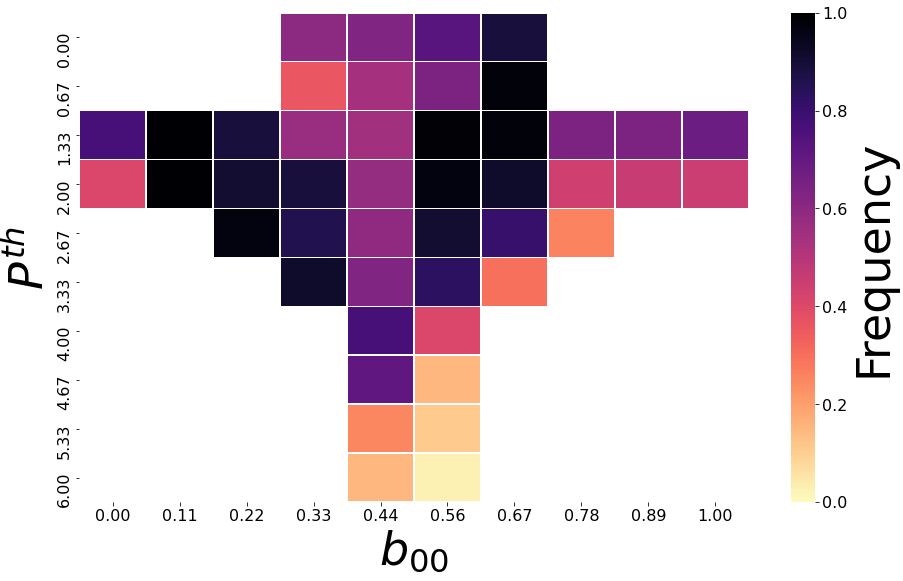

In [19]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
ax = sns.heatmap(final_freqs,linewidths=.5,cbar_kws={'label':"Frequency"},cmap = "magma_r", vmin=0, vmax=1, mask=mask,
                xticklabels = ['{:.2f}'.format(b_00s[i]) for i in range(0,len(b_00s))],
                yticklabels = ['{:.2f}'.format(Ps[i]) for i in range(0,len(Ps))])
ax.set(xlabel=r"$b_{00}$", ylabel=r'$P^{th}$')
fig.savefig(f'./plots/mf/phase_diag_b_00_P_freqs_beta=2.pdf', bbox_inches='tight')

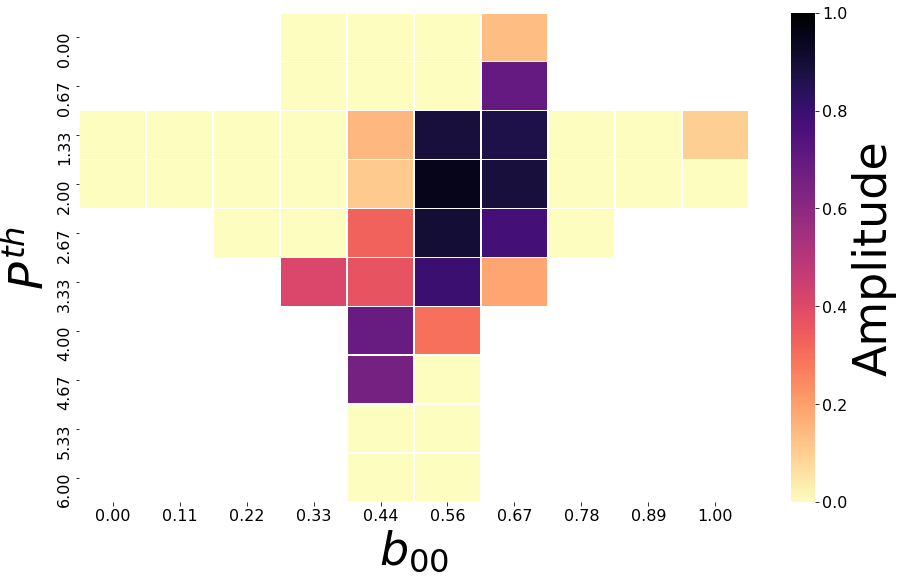

In [20]:
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
ax = sns.heatmap(final_amps,linewidths=.5,cbar_kws={'label':"Amplitude"},cmap = "magma_r", vmin=0, vmax=1, mask=mask,
                xticklabels = ['{:.2f}'.format(b_00s[i]) for i in range(0,len(b_00s))],
                yticklabels = ['{:.2f}'.format(Ps[i]) for i in range(0,len(Ps))])
ax.set(xlabel=r"$b_{00}$", ylabel=r'$P^{th}$')
fig.savefig(f'./plots/mf/phase_diag_b_00_P_amps_beta=2.pdf', bbox_inches='tight')

In [63]:
v = s*N/A 
print(f'N_1 > N_0 implies P < {v}')

N_1 > N_0 implies P < 1.768388256576615


In [158]:
A_2 = np.pi * (3**2 + 3**2)
P_t = s*N/A_2
print(P_t)

1.768388256576615


In [99]:
b_test = 0.8
u_b = 2*s*N/3/A * (3*b_test-1)/(2*b_test-1)
l_b = max(2*s*N/3/A * (3*b_test-2)/(2*b_test-1), 0)
print(f'upper = {u_b}, lower={l_b}')

upper = 2.750826176896957, lower=0.7859503362562739


In [244]:
n_1 = -3*2.67*A/2/s * (2*0.22-1) + (3*0.22-1)*N 
print(n_1)

91.06520883600382


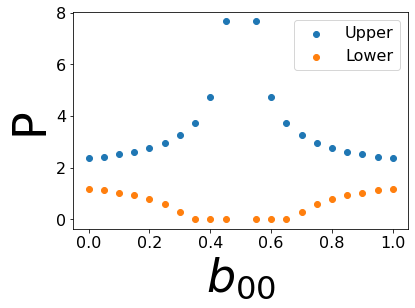

In [30]:
ys_1 = np.linspace(0,0.45, num =10)
ys_2 = np.linspace(0.55,1, num =10)
P_up_1 = [2*s*N/3/A * (3*x-2)/(2*x-1) for x in ys_1]
P_low_1 = [max(2*s*N/3/A * (3*x-1)/(2*x-1), 0) for x in ys_1]
P_bound_1 = [P_up_1, P_low_1]
P_up_2 = [2*s*N/3/A * (3*x-1)/(2*x-1) for x in ys_2]
P_low_2 = [max(2*s*N/3/A * (3*x-2)/(2*x-1), 0) for x in ys_2]
P_bound_2 = [P_up_2, P_low_2]
labels = ['Upper', 'Lower']
fig, ax = plt.subplots()
for i,color in enumerate(['tab:blue', 'tab:orange']):
    ax.scatter(ys_1,P_bound_1[i], c=color, label = labels[i])
    ax.scatter(ys_2, P_bound_2[i])
    ax.legend()
plt.xlabel('$b_{00}$')
plt.ylabel('P')
plt.savefig(f'./plots/mf/plot_bound_P.pdf', bbox_inches='tight')

Check initial values for iso

In [194]:
N = 100 # Number of agents
b_00 = np.linspace(0, 1, num=10)
final_x = []
final_y =[]
bs = []
for b in b_00:
    initial_states = []
    vector_x_test = np.random.rand(N)
    vector_y_test = np.random.rand(N)
    #vector_x_test = [x for x in np.arange(start=0.1, stop = 1, step = 0.1)]
    #vector_y_test = [y for y in np.arange(start=0.1, stop = 1, step = 0.1)]

    for i in tqdm(range(N)): 
        initial_states.append({'x' : vector_x_test[i], 
                             'y' : vector_y_test[i], 
                             'configuration' : 'line', # for 'square' only use N = 4 !
                             'fluctuation' : False, 
                             'radius' : 1.,
                             'realism' : True,
                             'frequency' : int(N/2), # number of agent in state 1 
                             'b' : np.array([[b, 1-b], [1-b, b]]), #[[x^2, xy], [xy, y^2]]
                             'beta' : 10, #beta = 10 smoothest curves for iso
                             'rho_0' : 1, 'rho_1' : 1,
                             'T' : 500,
                             'Q' : 1, 'S_factor' : 1, 'a' : 1, 'gamma_e' : 1,
                             'y_thr' : 1, 
                             'dt' : 0.1})
    model_test = AMSModel(x_max=3, y_max=3, max_steps=5000, model_type='isolated', initial_agents=N, initial_states=initial_states)
    model_test.run_model()
    final_x.append(model_test.datacollector.get_model_vars_dataframe().reset_index()['x'][5000])
    final_y.append(model_test.datacollector.get_model_vars_dataframe().reset_index()['y'][5000])


100%|██████████| 100/100 [00:00<00:00, 12494.95it/s]
C:\Users\Adridrou\Documents\Unif\ETHZ\Cours\Master_spring_2021\Projet\Implementation\agent.py:110: RuntimeWarning: overflow encountered in double_scalars
  - self.b[0][1] * x * self.y
C:\Users\Adridrou\Documents\Unif\ETHZ\Cours\Master_spring_2021\Projet\Implementation\agent.py:110: RuntimeWarning: invalid value encountered in double_scalars
  - self.b[0][1] * x * self.y
C:\Users\Adridrou\Documents\Unif\ETHZ\Cours\Master_spring_2021\Projet\Implementation\agent.py:130: RuntimeWarning: overflow encountered in double_scalars
  - self.b[1][0] * self.x * y
C:\Users\Adridrou\Documents\Unif\ETHZ\Cours\Master_spring_2021\Projet\Implementation\agent.py:130: RuntimeWarning: invalid value encountered in double_scalars
  - self.b[1][0] * self.x * y
100%|██████████| 100/100 [00:00<?, ?it/s]


In [192]:
x_y_max = []
x_y_min = []
for i in range(len(final_x)):
    for k in range(N):
        x_y_max.append(max(final_x[i][k], final_y[i][k]))
        x_y_min.append(min(final_x[i][k], final_y[i][k]))
x_y_min = np.array(x_y_min)
x_y_min = x_y_min.reshape([len(final_x), N])
x_y_max = np.array(x_y_max)
x_y_max = x_y_max.reshape([len(final_x), N])

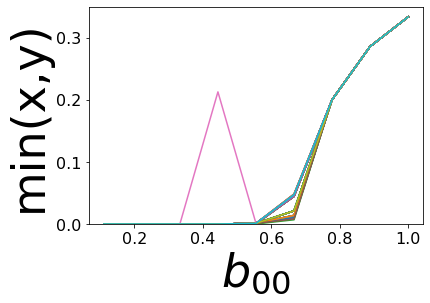

In [195]:
plt.plot(b_00, x_y_min)
plt.axis(ymin = 0)
plt.xlabel('$b_{00}$')
plt.ylabel('min(x,y)')
plt.savefig(f'./plots/iso/min_x_y_pour_iso_cond_inti_fct_b_00_with_realism.pdf', bbox_inches='tight')

Text(0, 0.5, 'max(x,y)')

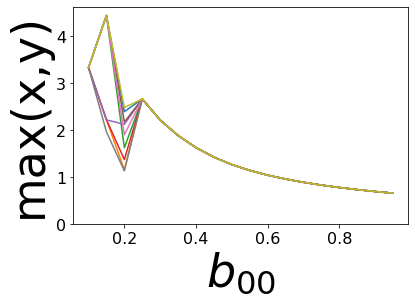

In [10]:
plt.plot(b_00, x_y_max)
plt.axis(ymin = 0)
plt.xlabel('$b_{00}$')
plt.ylabel('max(x,y)')

In [30]:
2/(3*0.03*0.2) -4

107.11111111111111